In [2]:
!python --version

Python 3.7.3


In [1]:
%matplotlib inline


In [2]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

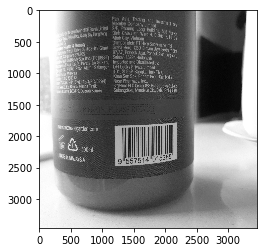

In [3]:
image = cv2.imread("01.jpg", 0)
image_out = cv2.imread("01.jpg")
plt.imshow(image, cmap='gray')

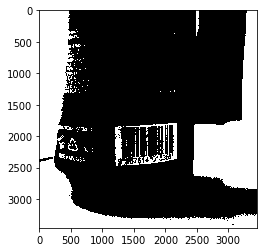

In [4]:
#thresholding
ret, thresh = cv2.threshold(image, 170, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

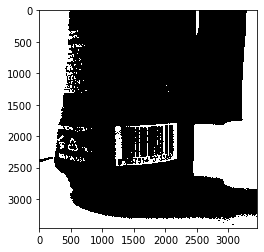

In [5]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
#remove some noise
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray')

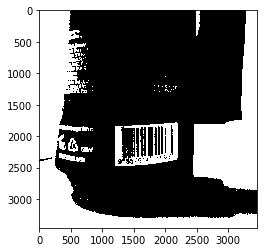

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (12, 12))
dilation = cv2.dilate(opening, kernel)
plt.imshow(dilation, cmap='gray')

In [7]:
# find the contours in the thresholded image
(cnts, _) = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# otherwise, sort the contours by area and compute the rotated
# bounding box of the largest contour
c = sorted(cnts, key = cv2.contourArea, reverse = True)[2]
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))

In [8]:
cv2.drawContours(image_out, [box], -1, (0, 255, 0), 3)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[253, 251, 250],
        [253, 251, 250],
        [253, 251, 250],
        ...,
        [193, 194, 192],
        [194, 195, 193],
        [194, 195, 193]],

       [[254, 252, 251],
        [254, 252, 251],
        [253, 251, 250],
        ...,
        [192, 193, 191],
        [193, 194, 192],
        [194, 195, 193]],

       [[254, 252, 251],
        [254, 252, 251],
        [253, 251, 250],
        ...,
        [192, 193, 191],
        [192, 193, 191],
        [193, 194, 192]]

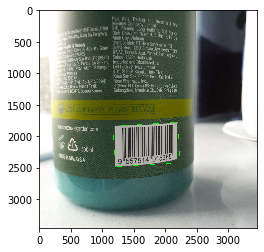

In [9]:
plt.imshow(image_out)


In [10]:
cv2.imwrite('out01.jpg', image_out)

True